<h1>Author: Iptihal Yousri Ibrahim</h1>
<h3>The Sparks Foundation Task_6 : Prediction Using Decision Tree Algorithm</h3>
<h4>Create the Decision Tree classifier and visualize it graphically</h4>

<h3>Loading Packages and Data</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = datasets.load_iris()
y = df.target
x = pd.DataFrame(df.data, columns=df.feature_names)

<h3>EDA ( Exploratory Data Analysis )</h3>

In [3]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Full summary of the dataframe**

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Dataset Statistical Information Display**

In [6]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Find the fatures dtypes**

In [7]:
x.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

**Shape of the data**

In [8]:
x.shape

(150, 4)

**Check Null Values**

In [9]:
x.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<h3>Visualizayion</h3>

Univariate Analysis

>Check outliers

<AxesSubplot:xlabel='sepal length (cm)'>

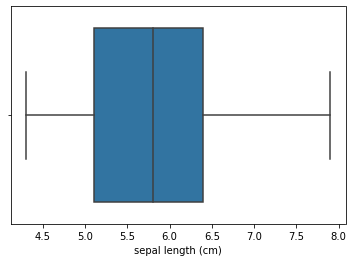

In [10]:
sns.boxplot(x['sepal length (cm)'])

<AxesSubplot:xlabel='sepal width (cm)'>

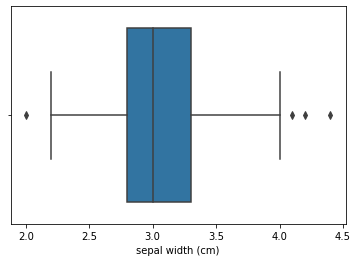

In [12]:
sns.boxplot(x['sepal width (cm)'])

<AxesSubplot:xlabel='petal length (cm)'>

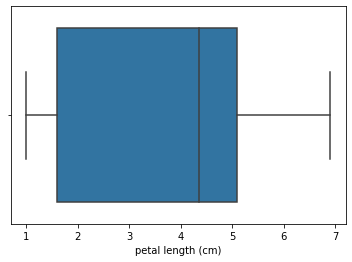

In [13]:
sns.boxplot(x['petal length (cm)'])

<AxesSubplot:xlabel='petal width (cm)'>

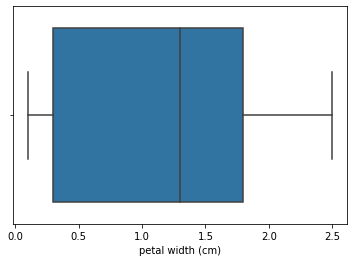

In [14]:
sns.boxplot(x['petal width (cm)'])

> Distribution 

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

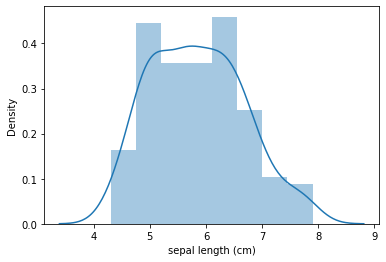

In [15]:
sns.distplot(x['sepal length (cm)'])

<AxesSubplot:xlabel='sepal width (cm)', ylabel='Density'>

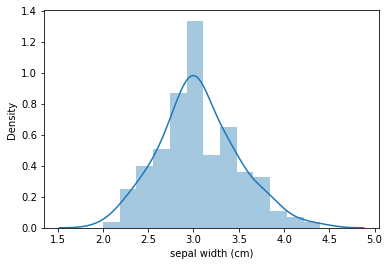

In [16]:
sns.distplot(x['sepal width (cm)'])

<AxesSubplot:xlabel='petal length (cm)', ylabel='Density'>

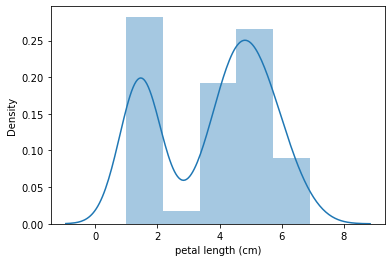

In [17]:
sns.distplot(x['petal length (cm)'])

<AxesSubplot:xlabel='petal width (cm)', ylabel='Density'>

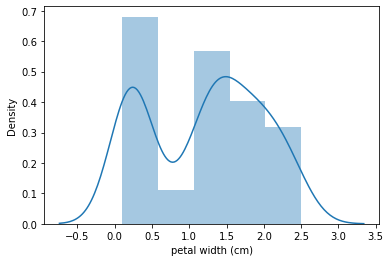

In [18]:
sns.distplot(x['petal width (cm)'])

>count plot

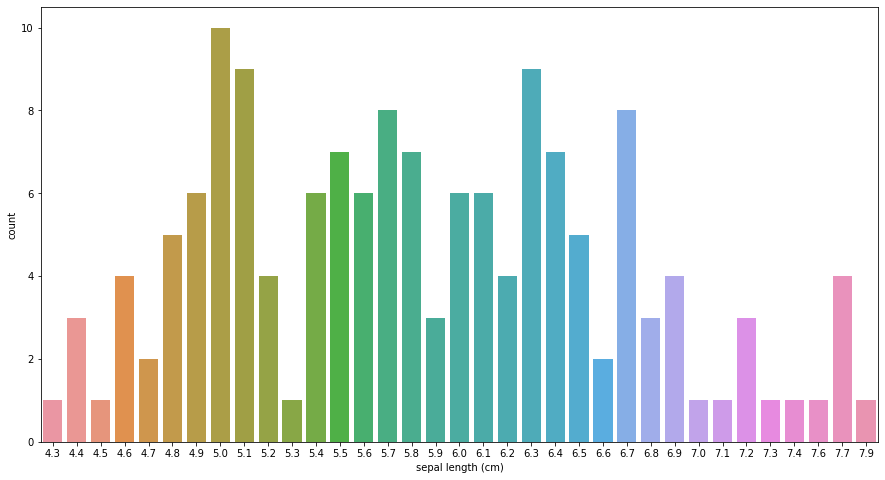

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(data=x, x='sepal length (cm)')
plt.show()

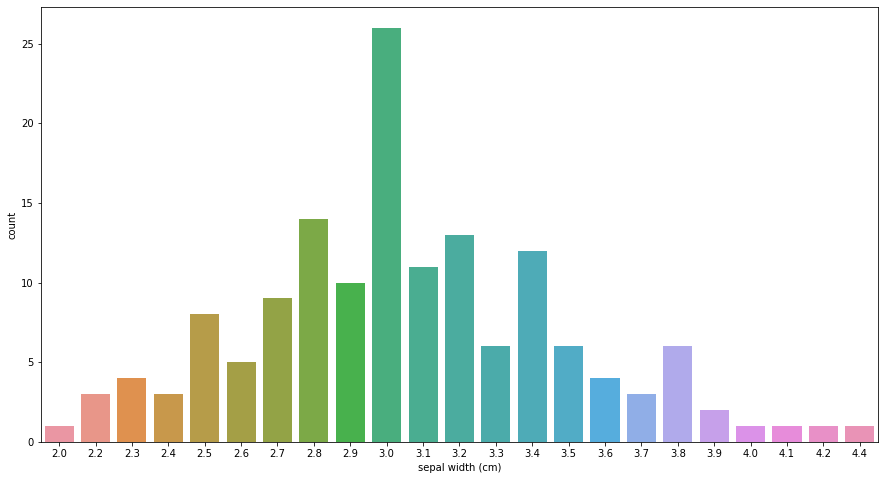

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(data=x, x='sepal width (cm)')
plt.show()

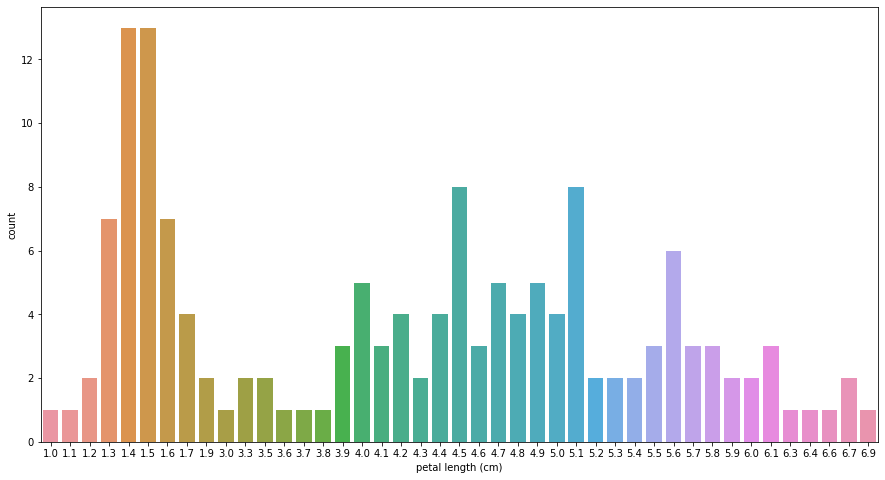

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(data=x, x='petal length (cm)')
plt.show()

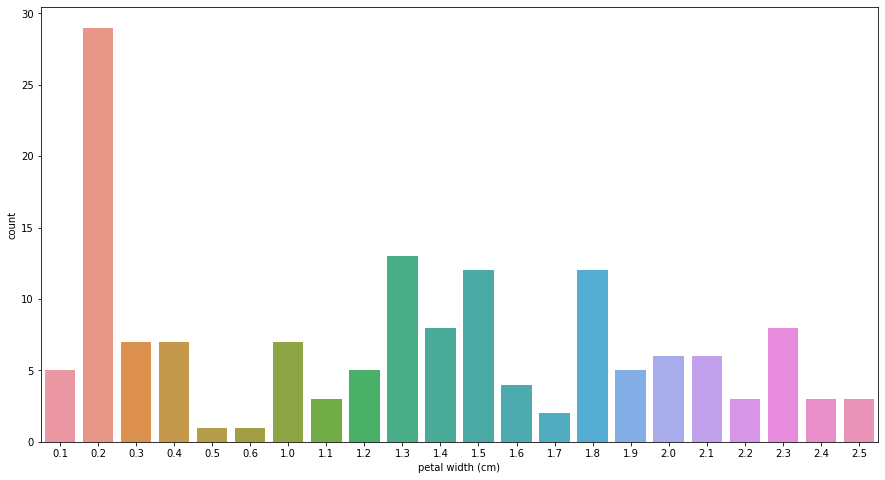

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(data=x, x='petal width (cm)')
plt.show()

**Bivariate Analysis**

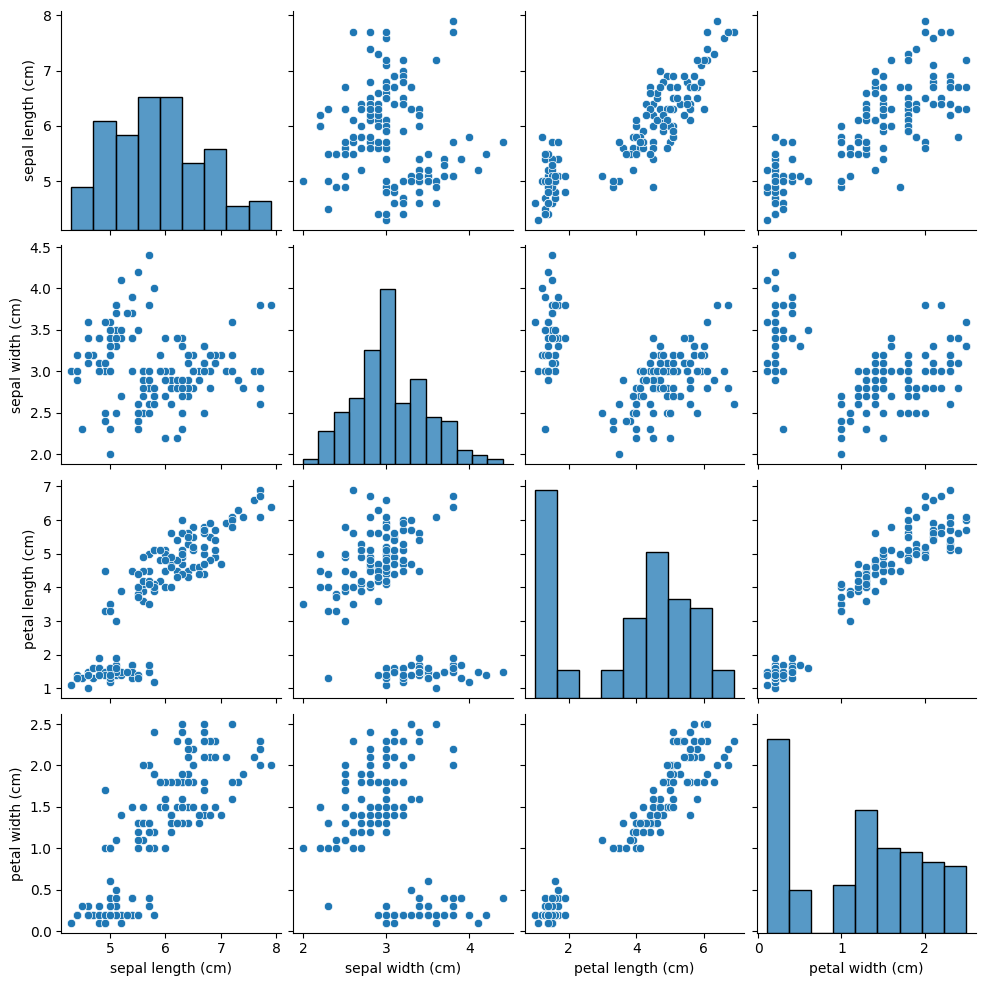

In [22]:
sns.pairplot(x)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

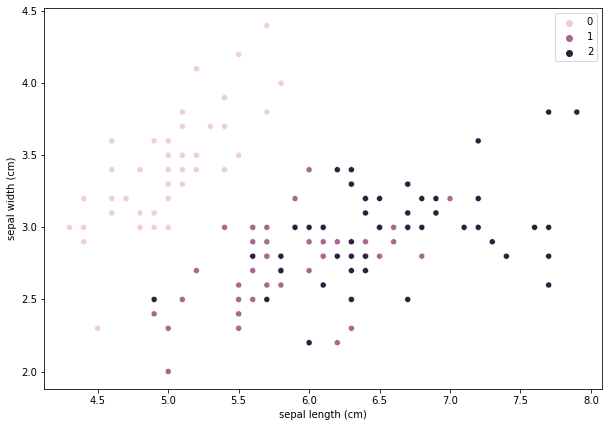

In [24]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=x, x='sepal length (cm)', y='sepal width (cm)', hue=y)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

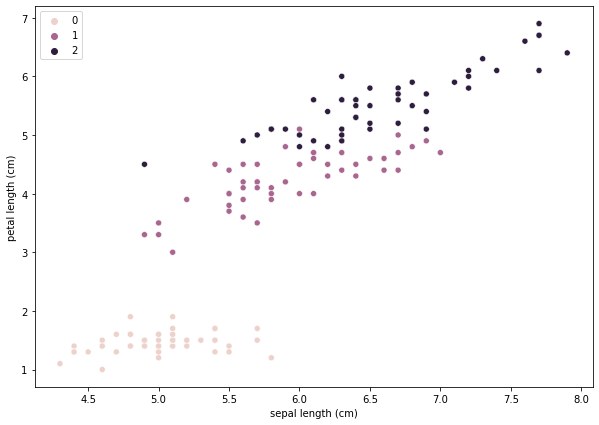

In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=x, x='sepal length (cm)', y='petal length (cm)', hue=y)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (cm)'>

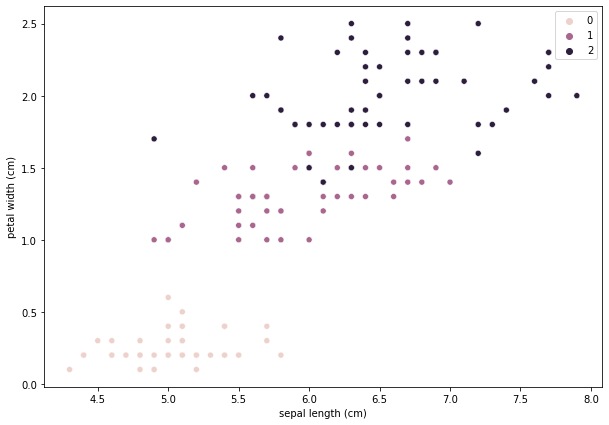

In [26]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=x, x='sepal length (cm)', y='petal width (cm)', hue=y)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

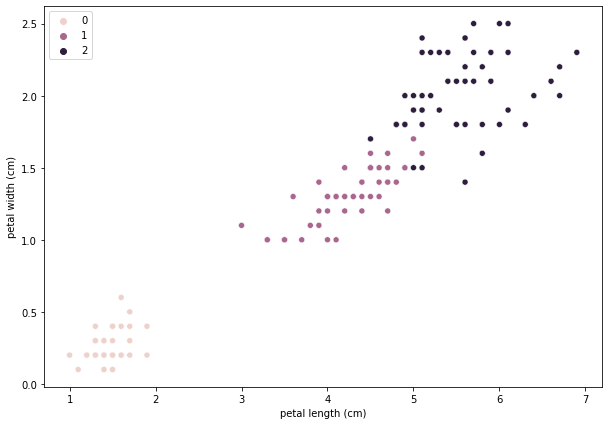

In [27]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=x, x='petal length (cm)', y='petal width (cm)', hue=y)

<AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>

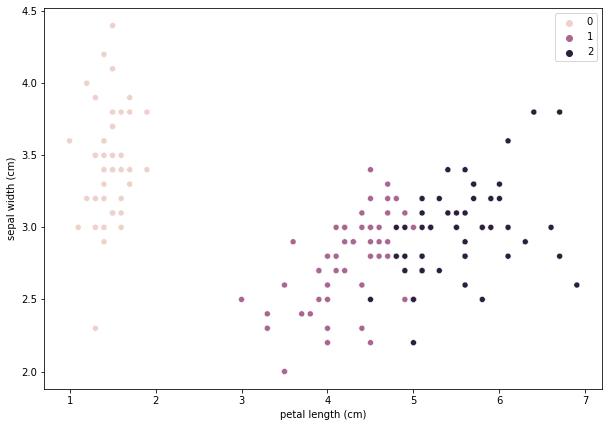

In [28]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=x, x='petal length (cm)', y='sepal width (cm)', hue=y)

<AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>

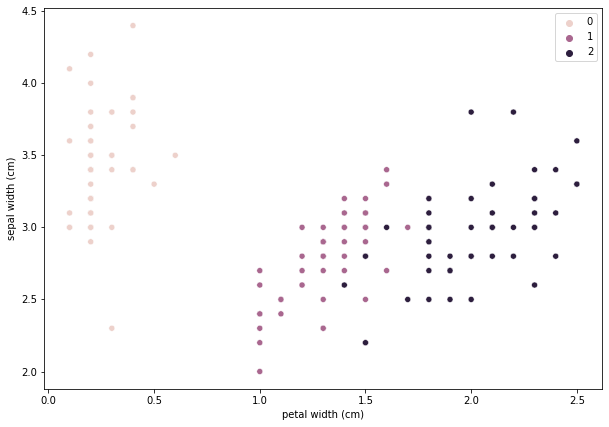

In [29]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=x, x='petal width (cm)', y='sepal width (cm)', hue=y)

**Modeling**

Spliting the data into train and test

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=22)

In [31]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(xtrain, ytrain)
prediction = decision_tree_model.predict(xtest)

Evaluating the model

In [32]:
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.71      1.00      0.83        10
           2       1.00      0.71      0.83        14

    accuracy                           0.87        30
   macro avg       0.90      0.90      0.89        30
weighted avg       0.90      0.87      0.87        30



Visualizing the graph

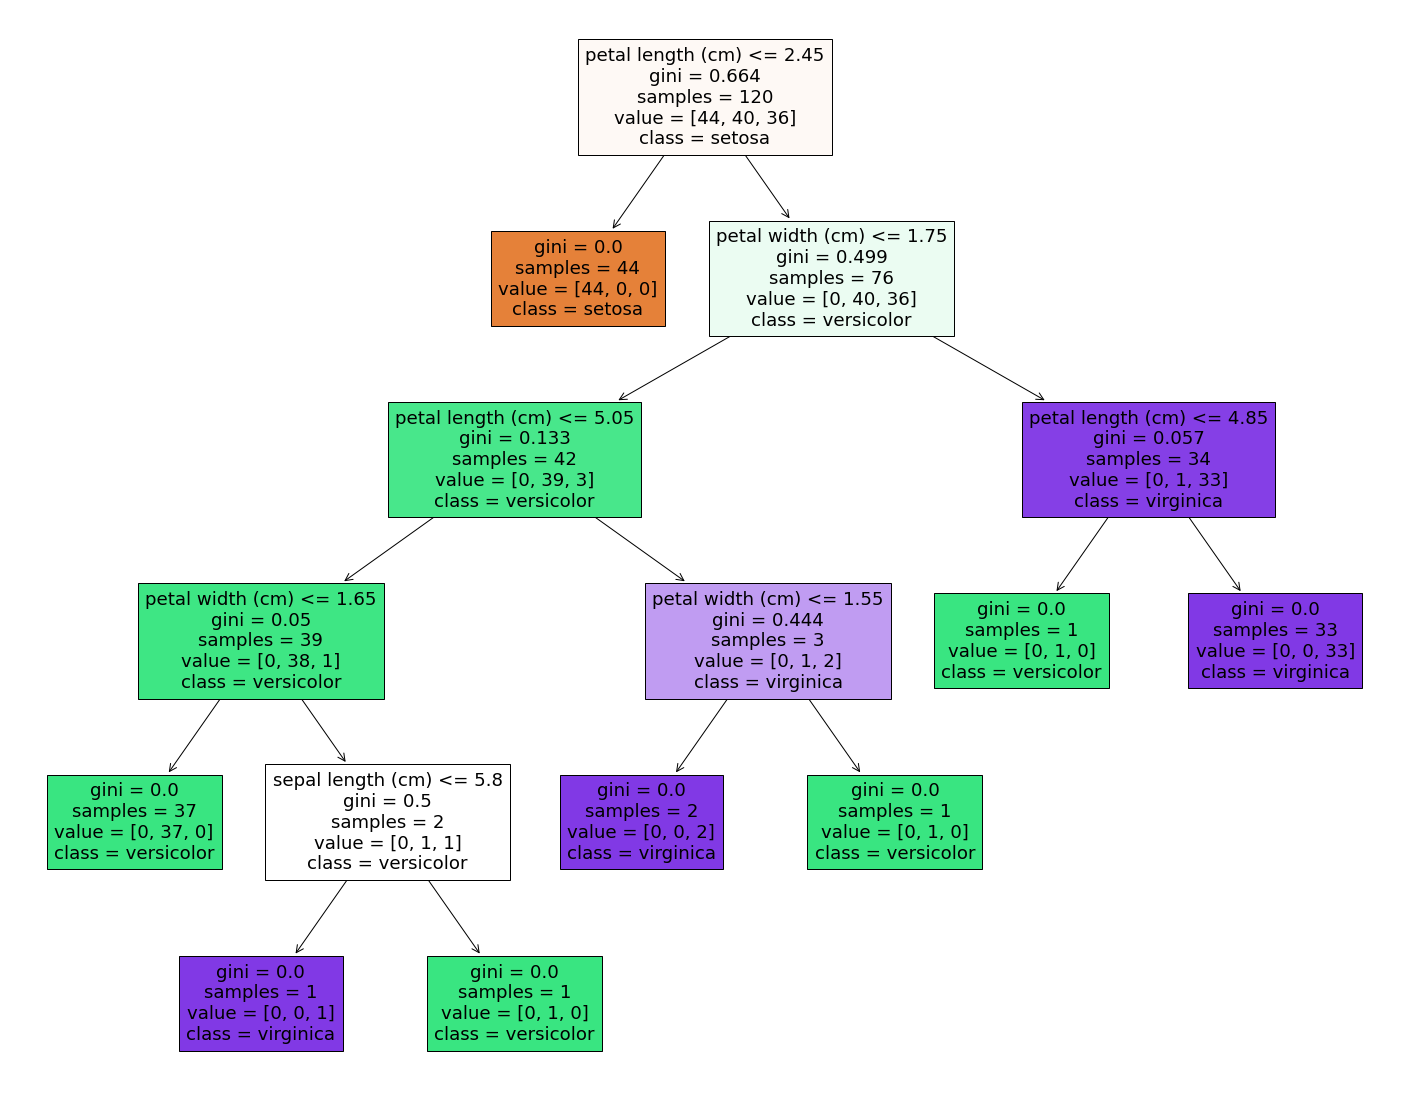

In [33]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_model, 
                   feature_names=df.feature_names,  
                   class_names=df.target_names,
                   filled=True)
